## 第2章 最小二乗法

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame
import seaborn as sns

### データセットの作成

In [ ]:
N = 10
M = [0, 1, 3, 9]

In [51]:
def create_dataset(n):
    dataset = pd.DataFrame(columns={'x', 't'})
    for i in range(n):
        x = float(i)/float(n - 1)
        t = np.sin(2 * np.pi * x) + np.random.normal(scale=0.3)
        dataset = dataset.append(pd.Series([x, t], index=['x', 't']), ignore_index=True)

    return dataset

          t         x
0 -0.270583  0.000000
1  0.355254  0.111111
2  0.936715  0.222222
3  1.083992  0.333333
4 -0.131676  0.444444
5 -0.239801  0.555556
6 -0.884057  0.666667
7 -1.003026  0.777778
8 -0.650278  0.888889
9 -0.149252  1.000000


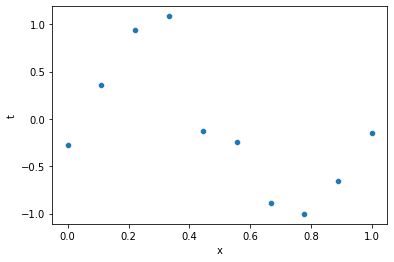

In [50]:
dataset = create_dataset(10)
sns.scatterplot(data=dataset, x='x', y='t')
print(dataset)

In [54]:
# datasetの関数fに対する最小二乗誤差を求める
def rms_error(dataset, f):
    error = 0.0
    print(len(dataset))
    for i, d in dataset.iterrows():
        print('X:', d.x, 'T:', d.t)
        x, t = d.x, d.t
        error += 0.5 * (t - f(x))**2
    
    return np.sqrt(2 * error / len(dataset))

In [ ]:
"""
最小二乗法で解を求める
dataeset: 
m: 次数
"""
def resolve(dataset, m):
